In [72]:
import pandas as pd
import statsmodels.api as sm
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
# For linear regression
salary = pd.read_csv('/Users/elenadubocanin/Desktop/Python Regression/Salary_dataset.csv')

# For log regression
BC = pd.read_csv('/Users/elenadubocanin/Desktop/Python Regression/breast_cancer.csv')

# For multivariate
housing = pd.read_csv('/Users/elenadubocanin/Desktop/Datasets-master/home_data.csv')

Simple Linear Regression

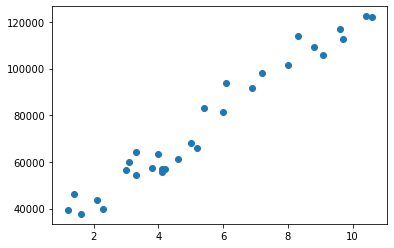

In [66]:
# Plot data with x being number of years y being the salary
x = salary['YearsExperience']
y = salary['Salary']
fig, ax = plt.subplots()
ax.scatter(x, y)

eval_env: 1


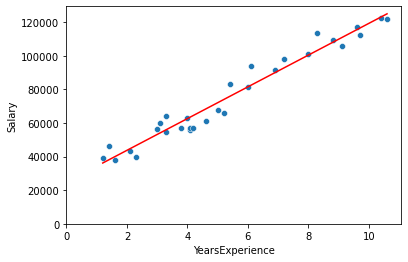

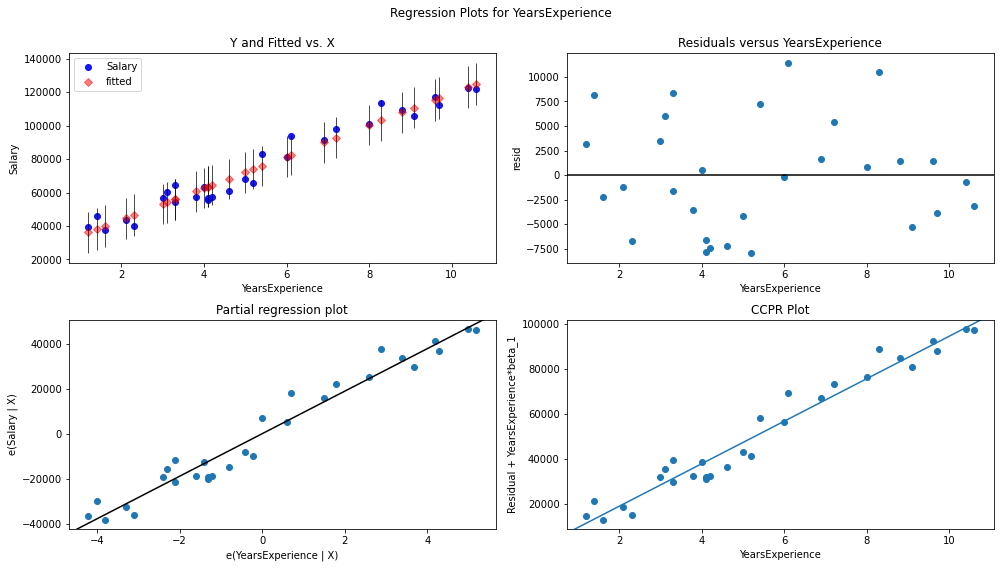

In [64]:
# Adding constant and fitting model
X = sm.add_constant(x) 
lm = sm.OLS(y,X).fit() 

# Predictions & Summary
preds = lm.predict(X)
lm.summary()

# Linear Equation based on values from summary (y = ax + b)
y_pred = (9449.9623 * X['YearsExperience']) + 24850

# Plotting Predictions (singular plot)
sns.scatterplot(x=X['YearsExperience'], y=y)
sns.lineplot(x=X['YearsExperience'],y=y_pred, color='red')
plt.xlim(0)
plt.ylim(0)

# Regression plots including residual plots
fig = plt.figure(figsize=(14, 8))
fig = sm.graphics.plot_regress_exog(lm,
                                    'YearsExperience',
                                    fig=fig)


Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [114]:
# Identifying X & Y and creatinf train/test sets
X = BC.iloc[:,1:-1].values
Y = BC.iloc[:,-1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

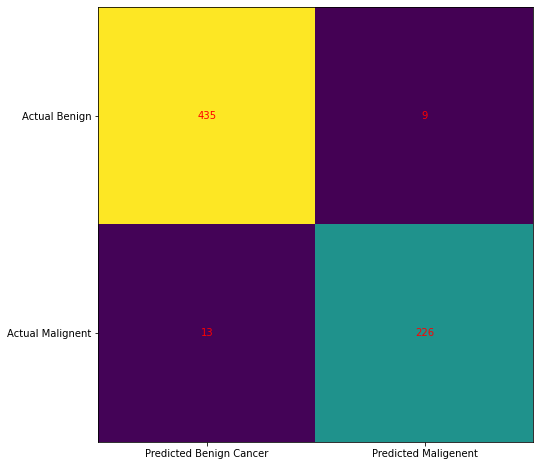

Accuracy : 95.9281 %
SD: 95.9281


In [120]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Setting yhat
y_hat = logreg.predict(X_test)

# Confusion Matrix Heat Map
conf_matrix = confusion_matrix(Y, logreg.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Benign Cancer', 'Predicted Maligenent'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Benign', 'Actual Malignent'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')
plt.show()

# Testing accuracy
accuracy = cross_val_score(estimator = logreg,X= X_train,y=Y_train, cv = 10)
print("Accuracy : {:.4f} %".format(accuracy.mean()*100))
print("SD: {:.4f}".format(accuracy.mean()*100))